In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, log_loss, silhouette_score
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaseEnsemble, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.cluster import AgglomerativeClustering, KMeans
import warnings
warnings.filterwarnings('ignore')

In [144]:
groceries = []
with open(r'..\Datasets\Groceries.csv', 'r') as f:groceries = f.read()
groceries = groceries.split('\n')


In [145]:
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(','))

In [146]:
te = TransactionEncoder()
te_ary = te.fit(groceries_list).transform(groceries_list)
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [147]:
fp_df = pd.DataFrame(te_ary, columns=te.columns_)


In [148]:
fp_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [149]:
itemFreq = fp_df.sum(axis=0) / len(fp_df)

In [150]:
# By spliting first 10 
# itemFreq = itemFreq.sort_values(ascending=False)
# ax = itemFreq[:10].plot.barh(color='blue')

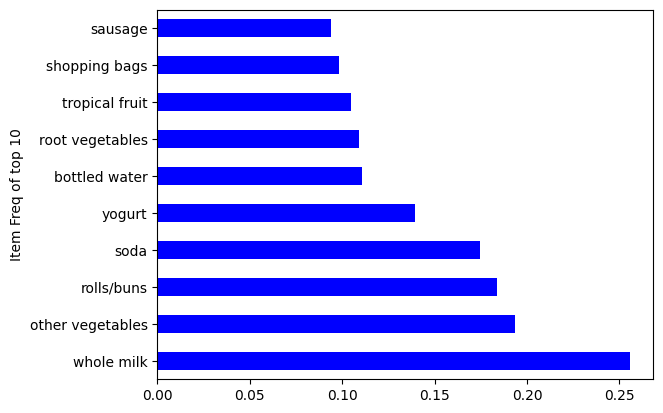

In [151]:
# Without spliting (using nlargest)
ax = itemFreq.nlargest(10).plot.barh(color='blue')

plt.ylabel('Item Freq of top 10')
plt.show()

In [152]:
# fp_df = fp_df.astype(bool)
itemsets = apriori(fp_df, min_support=0.01, use_colnames=True)

In [153]:
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992,0.565878
1,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,0.681990
2,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567,0.571107
3,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694,0.549779
4,"(pip fruit, other vegetables)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003,0.519843
5,"(rolls/buns, root vegetables)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792,0.629935
6,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,0.683367
7,"(yogurt, root vegetables)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,0.007916,1.613015,0.629266
8,"(whipped/sour cream, other vegetables)",(whole milk),0.028876,0.255516,0.014642,0.507042,1.984385,0.007263,1.510239,0.510816
9,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340,0.524577


In [154]:
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                               antecedents         consequents   support  \
0               (butter, other vegetables)        (whole milk)  0.011490   
1          (citrus fruit, root vegetables)  (other vegetables)  0.010371   
2                           (curd, yogurt)        (whole milk)  0.010066   
3        (domestic eggs, other vegetables)        (whole milk)  0.012303   
4            (pip fruit, other vegetables)        (whole milk)  0.013523   
5            (rolls/buns, root vegetables)  (other vegetables)  0.012201   
6        (tropical fruit, root vegetables)  (other vegetables)  0.012303   
7                (yogurt, root vegetables)  (other vegetables)  0.012913   
8   (whipped/sour cream, other vegetables)        (whole milk)  0.014642   
9               (yogurt, other vegetables)        (whole milk)  0.022267   
10           (rolls/buns, root vegetables)        (whole milk)  0.012710   
11       (tropical fruit, root vegetables)        (whole milk)  0.011998   
12          

In [155]:
rules.sort_values(by=['lift'], ascending=False).head(6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,0.681990
6,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,0.683367
5,"(rolls/buns, root vegetables)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792,0.629935
7,"(yogurt, root vegetables)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,0.007916,1.613015,0.629266
2,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567,0.571107
0,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992,0.565878


In [156]:
rule_df = rules.sort_values(by=['lift', 'confidence'], ascending=False)
rule_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,0.681990
6,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,0.683367
5,"(rolls/buns, root vegetables)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792,0.629935
7,"(yogurt, root vegetables)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,0.007916,1.613015,0.629266
2,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567,0.571107
0,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992,0.565878
11,"(tropical fruit, root vegetables)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553,0.563627
12,"(yogurt, root vegetables)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594,0.560625
3,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694,0.549779
14,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719,0.523711


In [157]:
print(rule_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                               antecedents         consequents   support  \
1          (citrus fruit, root vegetables)  (other vegetables)  0.010371   
6        (tropical fruit, root vegetables)  (other vegetables)  0.012303   
5            (rolls/buns, root vegetables)  (other vegetables)  0.012201   
7                (yogurt, root vegetables)  (other vegetables)  0.012913   
2                           (curd, yogurt)        (whole milk)  0.010066   
0               (butter, other vegetables)        (whole milk)  0.011490   
11       (tropical fruit, root vegetables)        (whole milk)  0.011998   
12               (yogurt, root vegetables)        (whole milk)  0.014540   
3        (domestic eggs, other vegetables)        (whole milk)  0.012303   
14            (whipped/sour cream, yogurt)        (whole milk)  0.010880   
10           (rolls/buns, root vegetables)        (whole milk)  0.012710   
4            (pip fruit, other vegetables)        (whole milk)  0.013523   
13          

In [158]:
relv_df = rule_df[rule_df['lift']>1]
relv_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,0.681990
6,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,0.683367
5,"(rolls/buns, root vegetables)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792,0.629935
7,"(yogurt, root vegetables)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,0.007916,1.613015,0.629266
2,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567,0.571107
0,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992,0.565878
11,"(tropical fruit, root vegetables)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553,0.563627
12,"(yogurt, root vegetables)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594,0.560625
3,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694,0.549779
14,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719,0.523711


In [159]:
print(relv_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                               antecedents         consequents   support  \
1          (citrus fruit, root vegetables)  (other vegetables)  0.010371   
6        (tropical fruit, root vegetables)  (other vegetables)  0.012303   
5            (rolls/buns, root vegetables)  (other vegetables)  0.012201   
7                (yogurt, root vegetables)  (other vegetables)  0.012913   
2                           (curd, yogurt)        (whole milk)  0.010066   
0               (butter, other vegetables)        (whole milk)  0.011490   
11       (tropical fruit, root vegetables)        (whole milk)  0.011998   
12               (yogurt, root vegetables)        (whole milk)  0.014540   
3        (domestic eggs, other vegetables)        (whole milk)  0.012303   
14            (whipped/sour cream, yogurt)        (whole milk)  0.010880   
10           (rolls/buns, root vegetables)        (whole milk)  0.012710   
4            (pip fruit, other vegetables)        (whole milk)  0.013523   
13          